<a href="https://colab.research.google.com/github/grandhigowthamramsai123/mrm/blob/main/linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded=files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (2).csv


In [62]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [63]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [64]:
df=df.drop(['car_ID','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],axis=1)

In [65]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


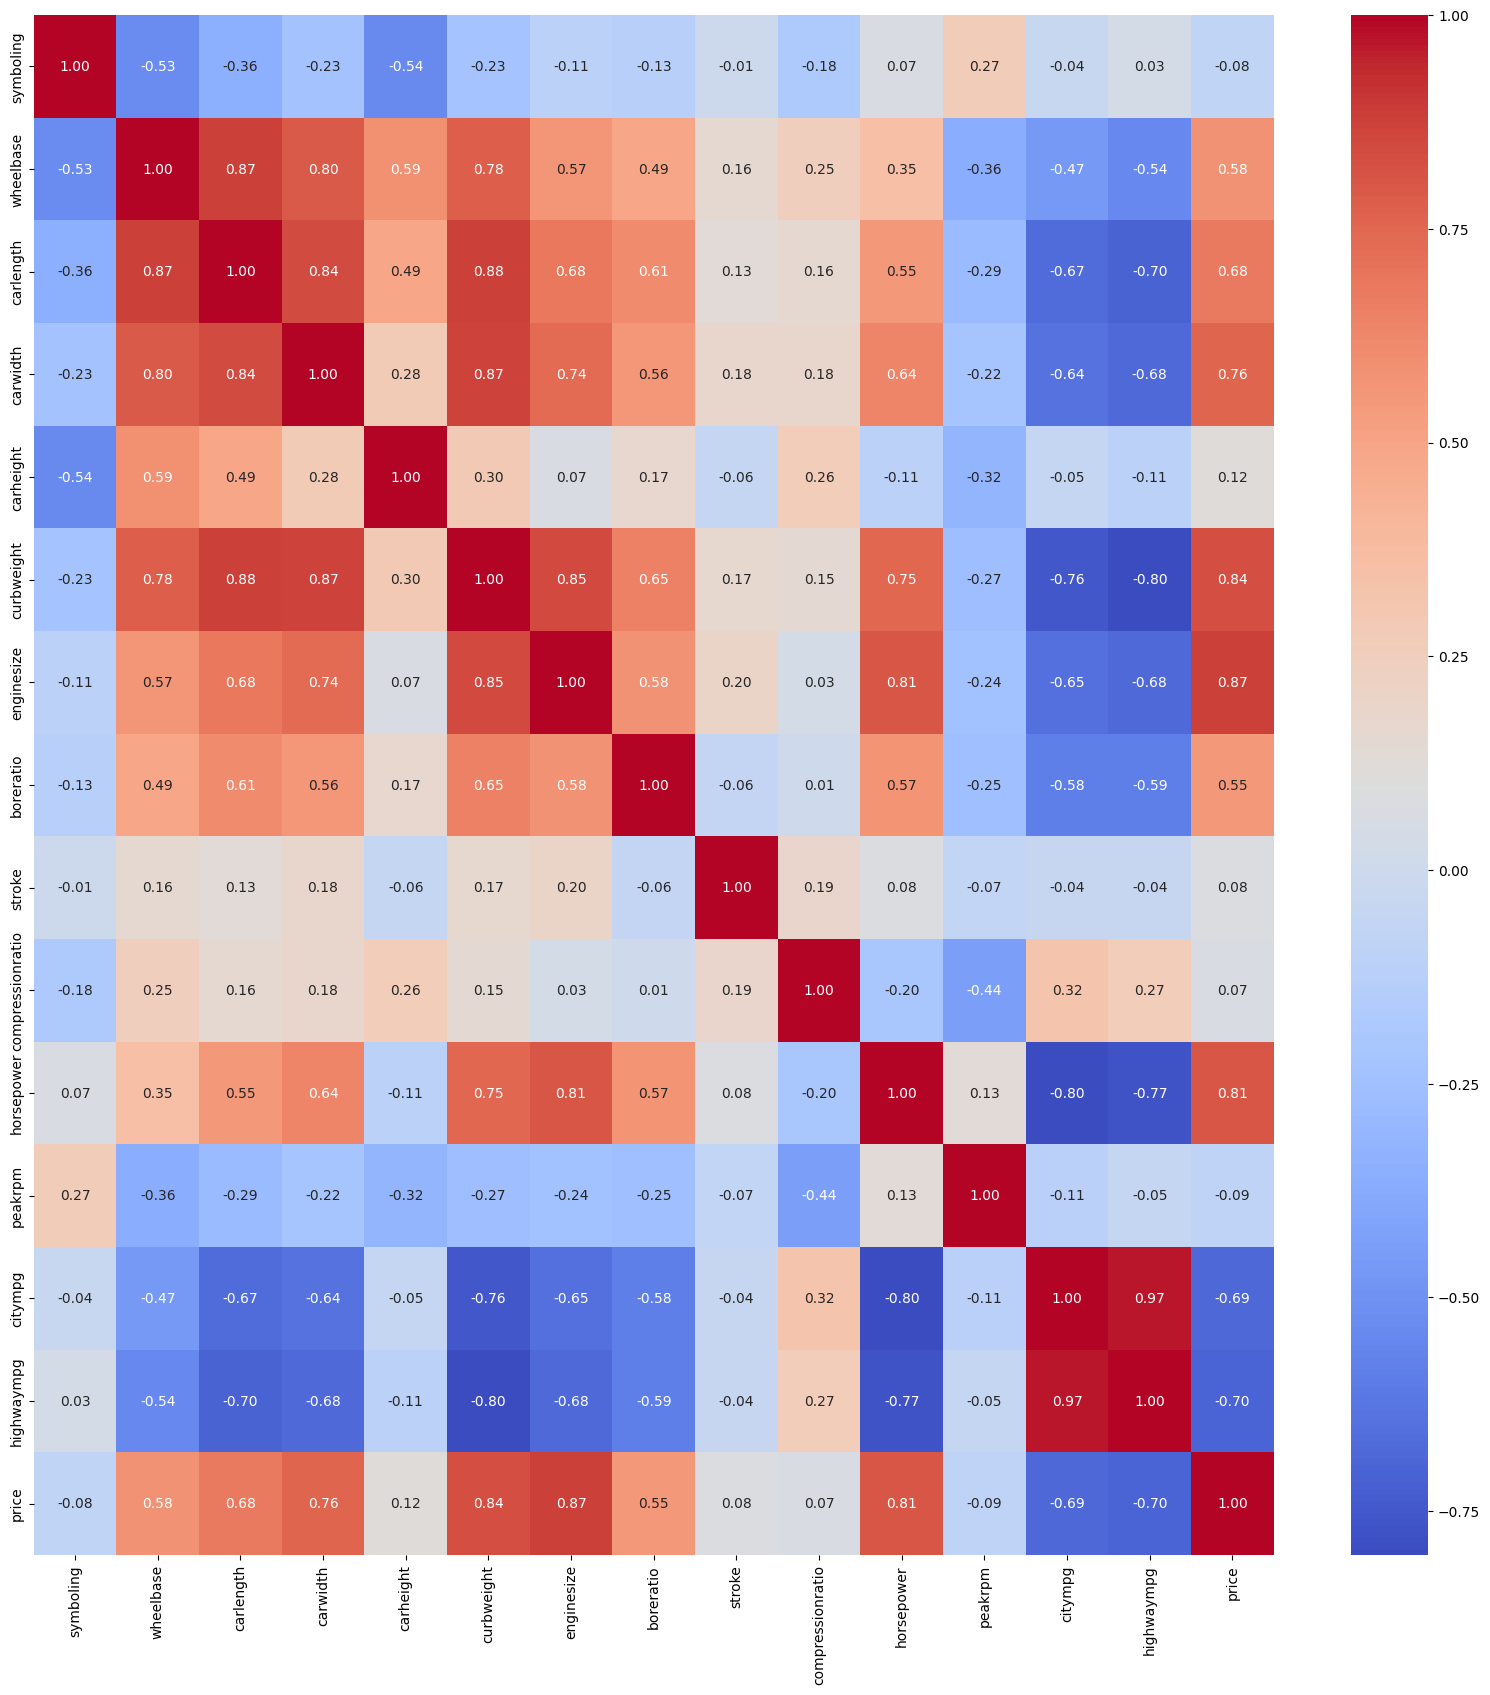

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt='.2f')

plt.show()

In [67]:
df=df.drop(['symboling','carheight','stroke','compressionratio','peakrpm'],axis=1)

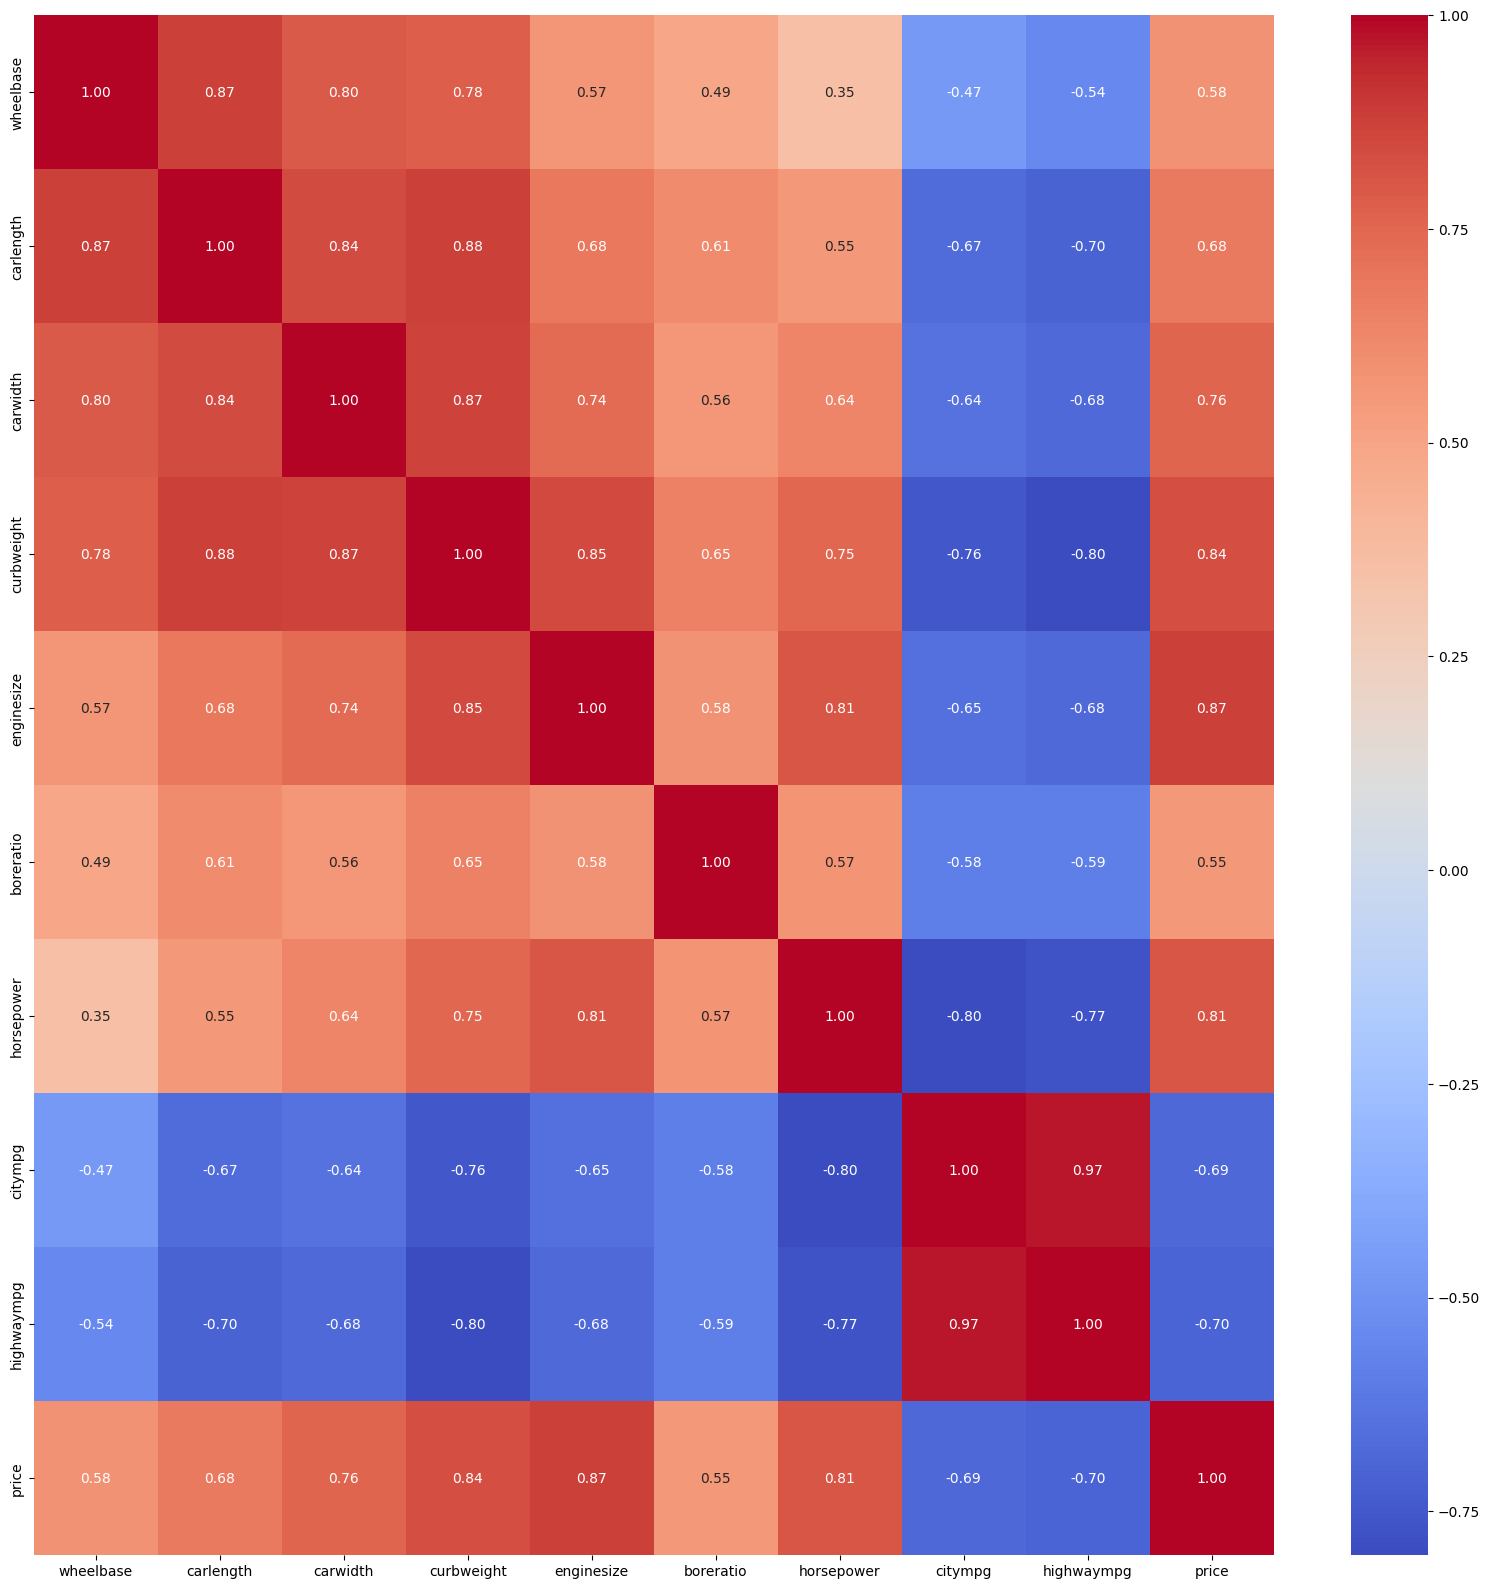

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt='.2f')

plt.show()

In [69]:
df=df.drop(['citympg','boreratio'],axis=1)

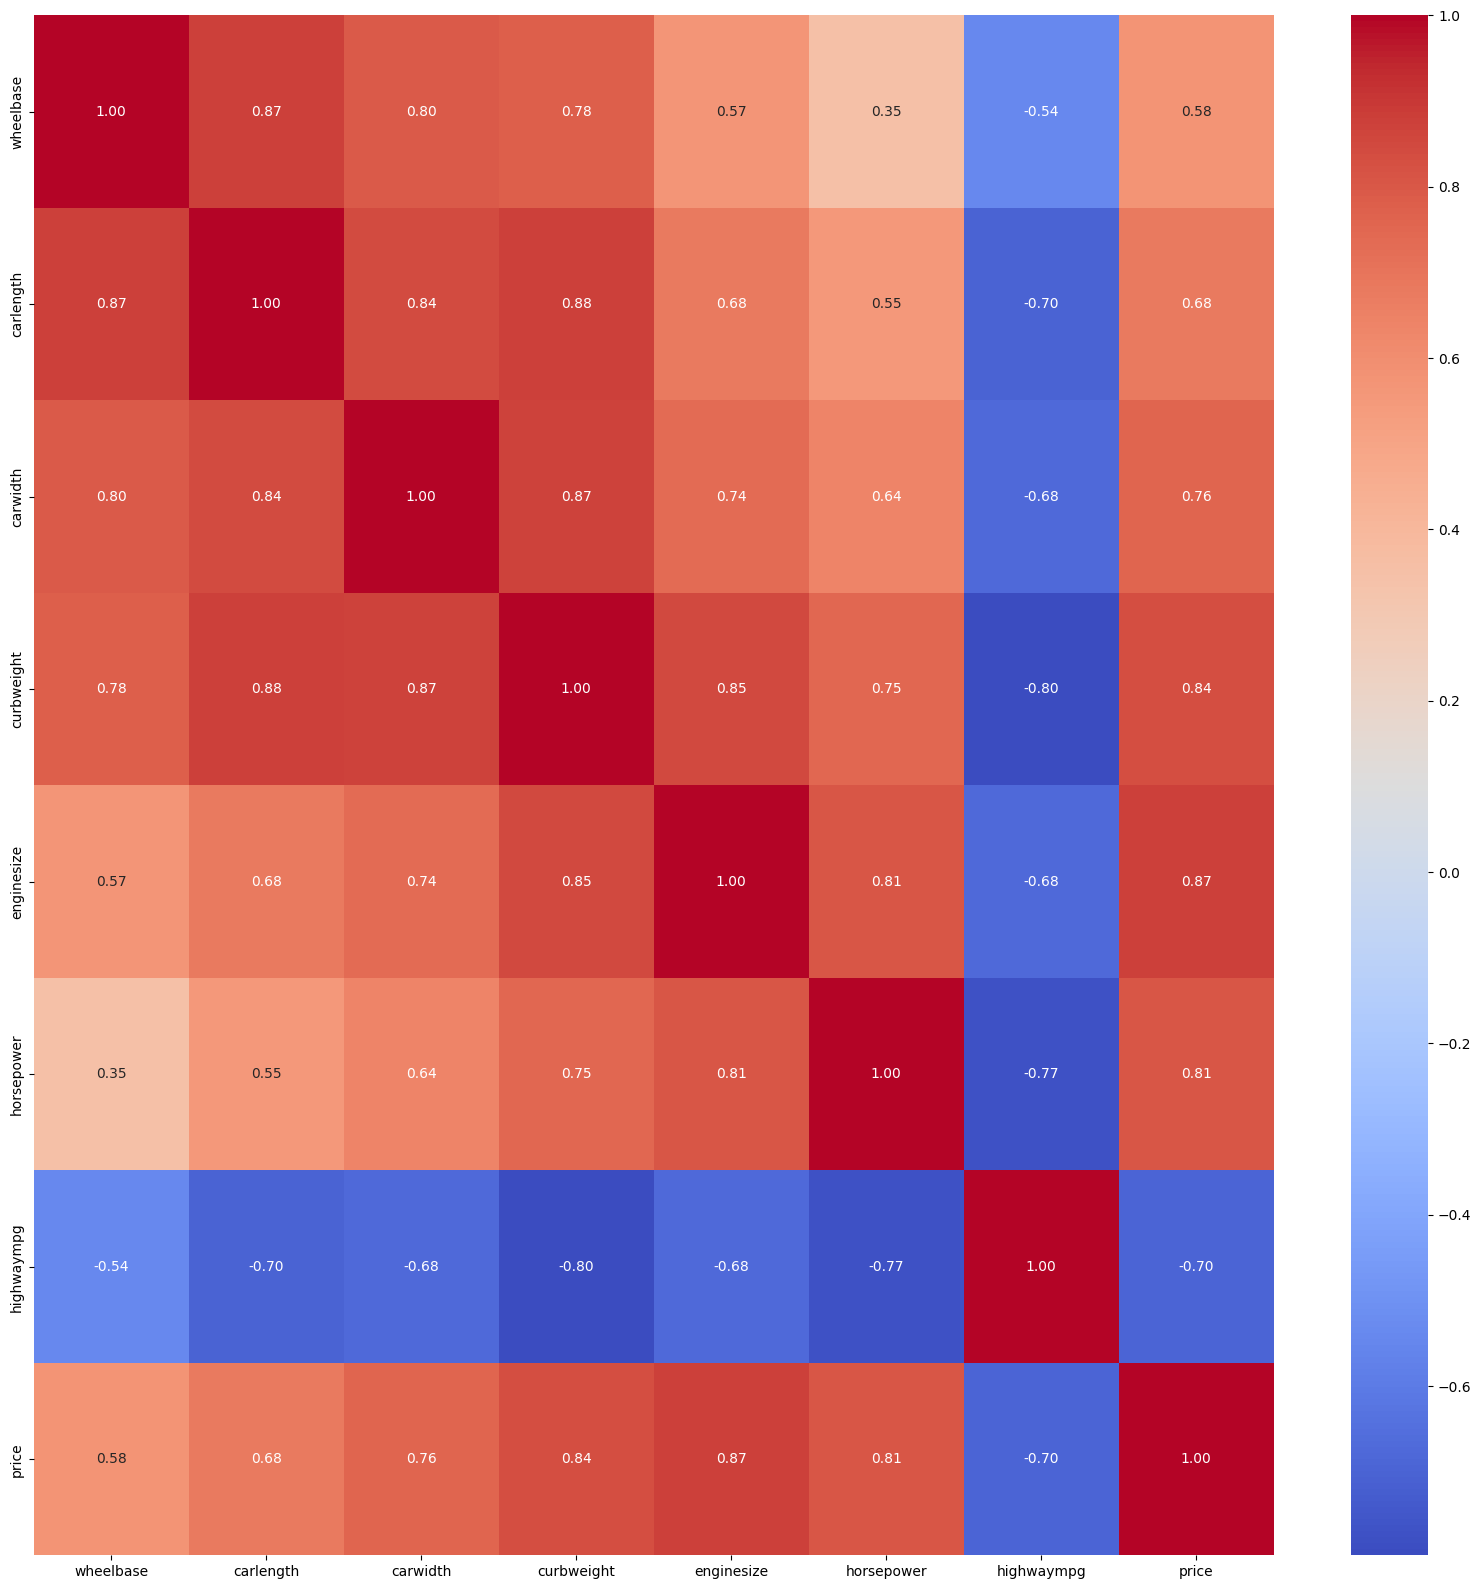

In [70]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt='.2f')

plt.show()

In [71]:
df=df.drop(['wheelbase'	,'carlength','carwidth'],axis=1)

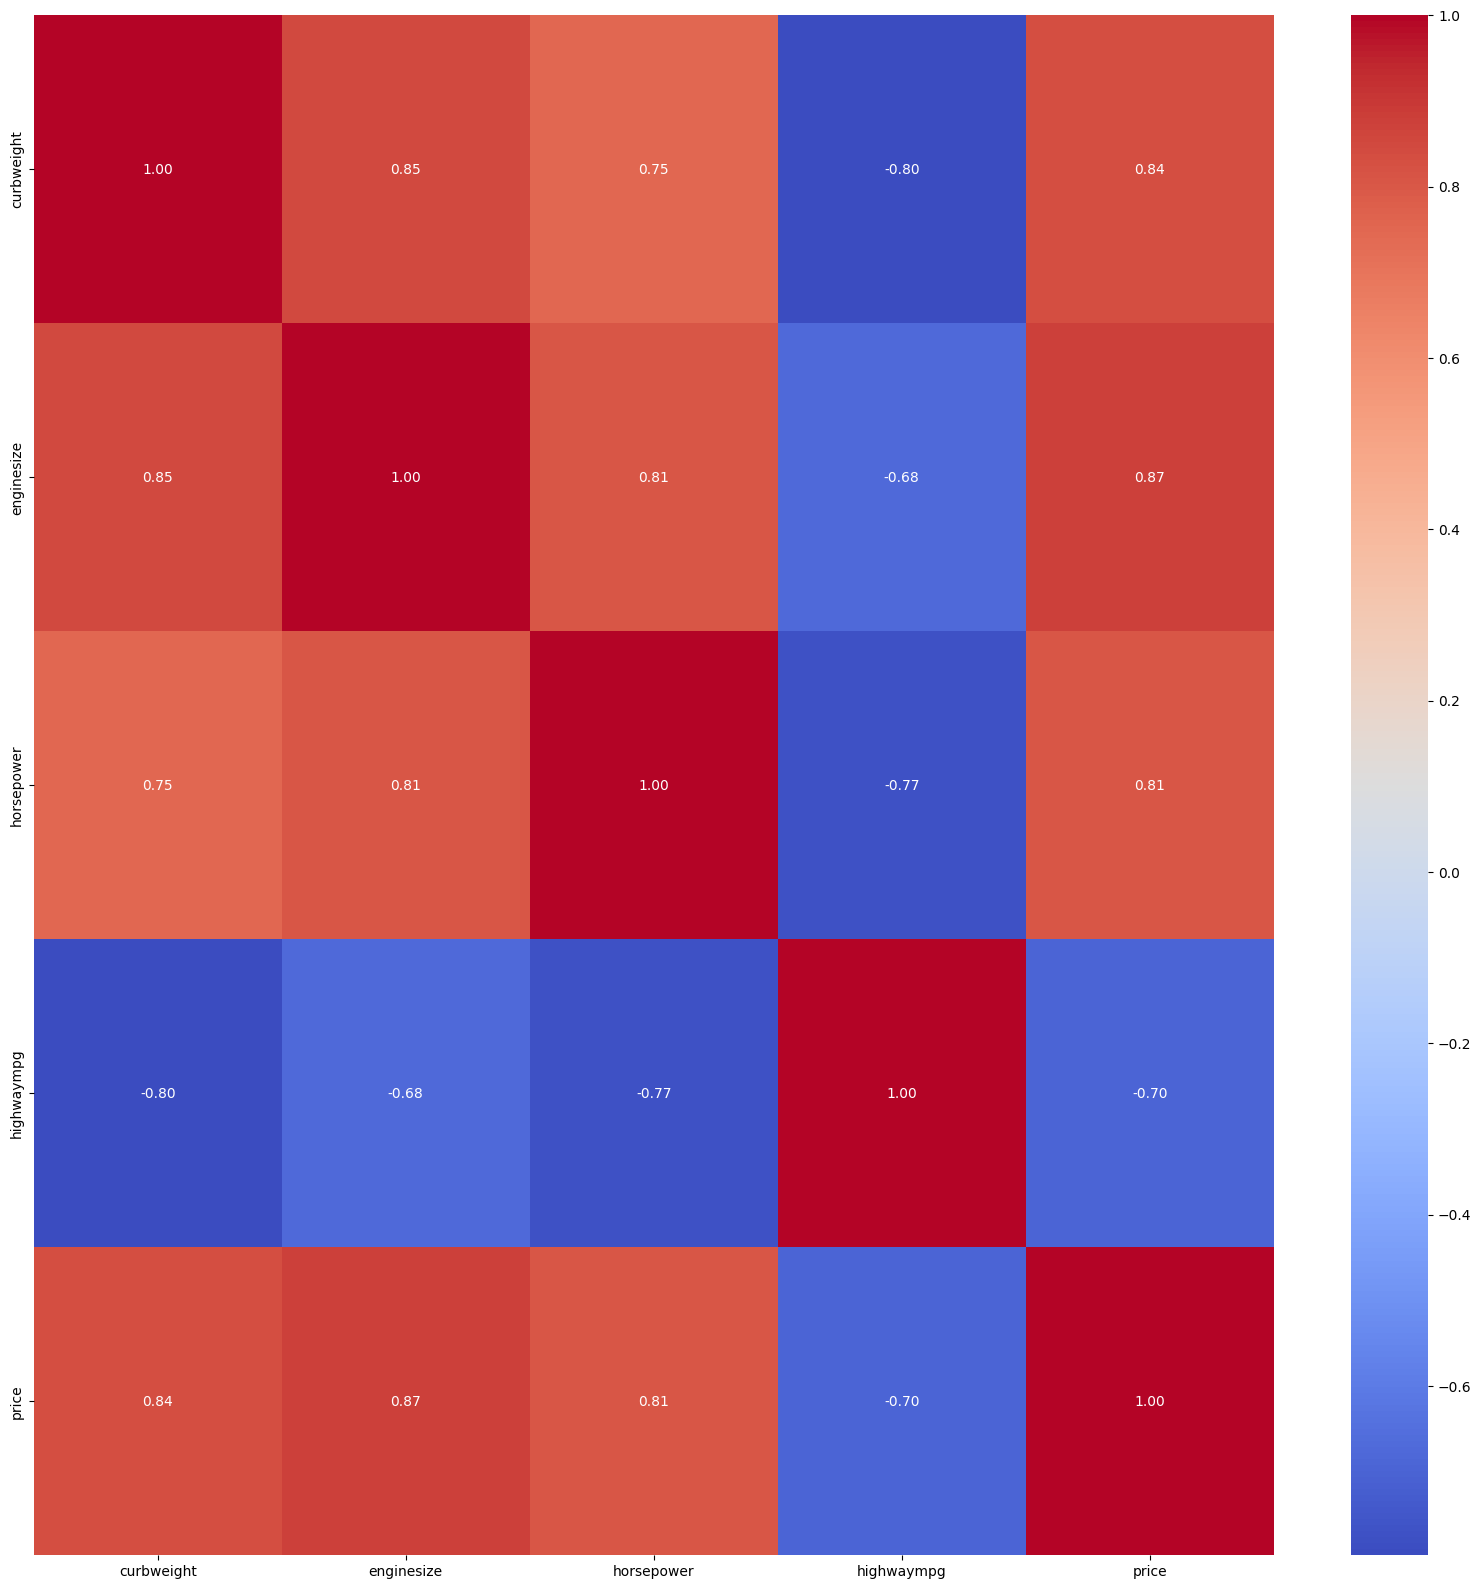

In [72]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt='.2f')

plt.show()

In [73]:
df.isnull().sum()

,0
curbweight,0
enginesize,0
horsepower,0
highwaympg,0
price,0


In [74]:
Train,Valid,Test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [75]:
def mean(Train, x):
    Train[x] = (Train[x] - Train[x].mean()) / Train[x].std()
    return Train[x]


In [76]:
Train['curbweight']=mean(Train,'curbweight')
Train['horsepower']=mean(Train,'horsepower')
Train['highwaympg']=mean(Train,'highwaympg')
Train['enginesize']=mean(Train,'enginesize')

Test['curbweight']=mean(Test,'curbweight')
Test['horsepower']=mean(Test,'horsepower')
Test['highwaympg']=mean(Test,'highwaympg')
Test['enginesize']=mean(Test,'enginesize')

In [77]:
Train


,curbweight,enginesize,horsepower,highwaympg,price
34,-1.053381,-0.822115,-0.683746,0.373845,7129.0
178,0.852851,1.058415,1.437489,-1.032362,16558.0
137,0.611769,-0.131794,1.412534,-0.751120,18620.0
183,-0.580560,-0.417444,-0.459144,0.373845,7975.0
80,-0.279675,-0.393640,0.314483,-0.188638,9959.0
...,...,...,...,...,...
61,-0.251642,-0.107990,-0.484100,0.092604,10595.0
157,-0.767446,-0.679290,-0.833480,0.795708,7198.0
54,-1.064594,-0.845919,-0.883392,0.936328,7395.0
184,-0.477773,-0.703094,-1.282683,2.061294,7995.0


In [78]:
    print(df.shape[0])


205


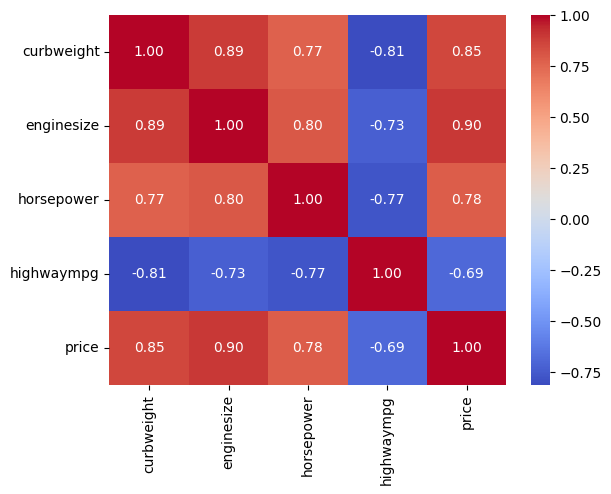

In [79]:
sns.heatmap(Train.corr(),annot=True,cmap="coolwarm",fmt='.2f')
plt.show()

In [80]:
def seperate(df):
  x=df.iloc[:, :-1]
  y=df.iloc[:,-1]

  return x,y
train_x,train_y=seperate(Train)
valid_x,valid_y=seperate(Valid)
test_x,test_y=seperate(Test)

In [81]:
class blinear_regression():
  def __init__(self,X,Y):
    self.X=X
    self.Y=Y
    self.theta=np.zeros((5,205))
    self.sum_cols=0
    self.weights=None
    self.bias=None
  def weigh(self):
    self.weights_1D=np.zeros(5,)
    self.weights_2D = np.expand_dims(self.weights_1D, axis=1)

    bias=self.weights_2D[0]
  def val(self):

    arr_X = self.X.to_numpy()
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)

    X0_ARR=np.ones(self.X.shape[0],)
    X0_ARR_2D= np.expand_dims(X0_ARR, axis=1)
    arr_X=np.hstack((X0_ARR_2D,arr_X))

    epoch=1000
    for i in range(epoch):
        y_pred = np.dot(arr_X, self.weights_2D)
        error = y_pred - arr_Y
        gradient = (1/arr_X.shape[0]) * np.dot(arr_X.T, error)
        self.weights_2D -= 0.01 * gradient

        if(i%100==0):
          print('BIAS  : ',self.weights_2D[0][0],'WEIGHTS 1  :  ',self.weights_2D[1][0],'WEIGHTS 2  :  ',self.weights_2D[2][0],'WEIGHTS 3  :  ',self.weights_2D[3][0],'WEIGHTS 4  :  ',self.weights_2D[4][0])

    print(self.weights_2D)
  def test(self,X,Y):
    self.X=X
    self.Y=Y
    arr_X = self.X.to_numpy()
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)
    X0_ARR=np.ones(self.X.shape[0],)
    X0_ARR_2D= np.expand_dims(X0_ARR, axis=1)
    arr_X=np.hstack((X0_ARR_2D,arr_X))
    iteration=0
    sum=0
    sum1=0
    self.pre=np.empty([arr_X.shape[0], 1])
    while(iteration<arr_X.shape[0]):
      c=arr_Y.mean()

      FEATURE_2D= np.expand_dims(arr_X[iteration], axis=1)
      FEATURE_2D=np.transpose(FEATURE_2D)
      DOT_PROD=np.dot(FEATURE_2D,self.weights_2D)
      self.pre[iteration][0]= DOT_PROD[0][0]
      sum+=(DOT_PROD[0][0]-arr_Y[iteration][0])**2
      sum1+=(arr_Y[iteration][0]-c)**2
      iteration+=1
    print(c)
    print(1-sum/sum1)
  def plot(self,Y):
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)
    print(arr_Y.shape,self.pre.shape )
    plt.scatter(arr_Y[:,0],self.pre[:,0] , color='red', label='Actual Values')
    plt.plot(arr_Y,arr_Y, color='blue', label='Predicted Line')
    plt.show()

In [82]:

MODEL=blinear_regression(train_x,train_y)


MODEL.weigh()

MODEL.val()

BIAS  :  130.84804878048783 WEIGHTS 1  :   70.55487088523529 WEIGHTS 2  :   74.28923995277938 WEIGHTS 3  :   64.64987921637184 WEIGHTS 4  :   -57.3640470608122
BIAS  :  8343.237731079369 WEIGHTS 1  :   2145.979642651799 WEIGHTS 2  :   2544.5150624562993 WEIGHTS 3  :   1799.7424596324845 WEIGHTS 4  :   -1180.091570484327
BIAS  :  11349.237953939339 WEIGHTS 1  :   2325.8273462616553 WEIGHTS 2  :   3060.3974458517673 WEIGHTS 3  :   1791.8321657350714 WEIGHTS 4  :   -715.0630180167473
BIAS  :  12449.531253380625 WEIGHTS 1  :   2407.545627161387 WEIGHTS 2  :   3412.3662201716816 WEIGHTS 3  :   1744.492200146125 WEIGHTS 4  :   -321.2815261587427
BIAS  :  12852.274185862363 WEIGHTS 1  :   2459.793488259623 WEIGHTS 2  :   3682.919894866069 WEIGHTS 3  :   1708.5570563277051 WEIGHTS 4  :   -23.21371818822901
BIAS  :  12999.691124369898 WEIGHTS 1  :   2492.071250346799 WEIGHTS 2  :   3892.8304367206774 WEIGHTS 3  :   1682.0931945586487 WEIGHTS 4  :   201.00312985364135
BIAS  :  13053.650491515147

In [83]:
MODEL.test(test_x,test_y)

13602.540658536585
0.8288873261658813


(41, 1) (41, 1)


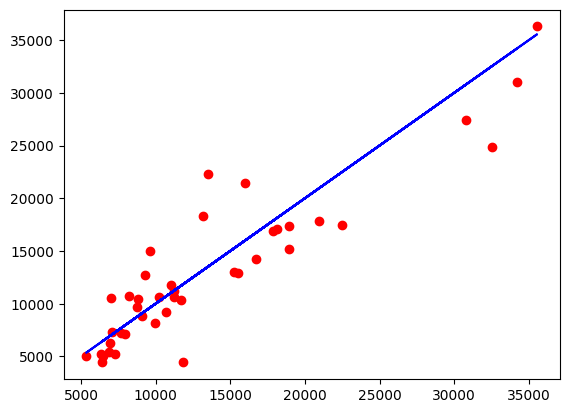

In [84]:
MODEL.plot(test_y)